<a href="https://colab.research.google.com/github/crsimmons1/lifeexpectancy/blob/master/Regression/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression for Predicting Life Expectancy**

This file uses support vector machines to predict the life expectancy for various countries for the years 2000-2015. 

This data can be found [here](https://www.kaggle.com/kumarajarshi/life-expectancy-who) on Kaggle. Please see this git [repository](https://github.com/crsimmons1/lifeexpectancy) for more information on the data cleaning that was done. 


## **Import the Data**


In [0]:
import pandas as pd
import numpy as np

# Import data
data= pd.read_csv("cleaned_data.csv")

# Split in X and y 
y = pd.DataFrame(data.LifeExpectancy)
X = data.drop(columns=['LifeExpectancy','TExp', 'Year'])

#Train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=33)

In [2]:
X_train.shape

(2025, 19)

In [0]:
from sklearn.linear_model import LinearRegression

model_ols = LinearRegression()
model_ols.fit(X=X_train, y=y_train)
model_ols_train_preds = model_ols.predict(X_train)

In [4]:
# Use SGDRegressor to compare to numpy time 
from sklearn.linear_model import SGDRegressor
import time 
model_2 = SGDRegressor()
t_start = time.time()
model_2.fit(X=X_train, y=y_train)
t_end = time.time()

t_start - t_end

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.010830163955688477

In [0]:
from sklearn import metrics

RESULTS = {}

def evaluate_model(y_true, y_pred):# Function to evaluate model 
    return {
        "mae": metrics.mean_absolute_error(y_true, y_pred),
        "exp_var": metrics.explained_variance_score(y_true, y_pred),
        "mse" : metrics.mean_squared_error(y_true, y_pred),
        "r^2" : metrics.r2_score(y_true, y_pred),
           }

In [0]:
RESULTS["ols_train"] = evaluate_model(
    y_train,
    model_ols_train_preds
)

In [7]:
model_ols_test_preds = model_ols.predict(X_test)

RESULTS["ols_test"] = evaluate_model(
    y_test,
    model_ols_test_preds
)
pd.DataFrame(RESULTS)

,ols_train,ols_test
mae,2.805181,3.006620
exp_var,0.838265,0.820882
mse,13.955949,17.144870
r^2,0.838265,0.820624


In [0]:
print(model_ols.coef_)

[[ 1.15160267e+00 -1.66207746e-02  9.29747925e-02 -8.55255842e-03
   1.34248164e-04 -5.69797084e-03 -8.77407511e-06  3.18973046e-02
  -6.92316120e-02  2.79754221e-02  1.01916309e-02  2.40579567e-02
  -4.67223993e-01  2.63192752e-05 -1.46011708e-09 -5.17484694e-02
   2.26885652e-03  7.00154611e+00  8.60381256e-01]]


## By Hand (Numpy/Pandas)

This exists as a proof of concept. Using numpy and pandas, the coefficients of linear regression are found from the closed-form equation using matrix operations. 

In [0]:
 # Make into numpy array 
 X=np.array(X_train)
 Y=np.array(y_train)

In [0]:
# Add a column of ones (for coefficients)
n,m = X.shape # for generality
X0 = np.ones((n,1))
Xnew = np.hstack((X,X0))

In [0]:
# Start Time
import time
t_start = time.time()

# Calculate the Coefficients
betas = np.linalg.inv(Xnew.T.dot(Xnew)).dot(Xnew.T).dot(y_train)

# Time end
t_end = time.time()

In [0]:
# Calculate time 
t_start-t_end

-0.0066335201263427734

In [0]:
# Coefficients
print(betas)

[[ 1.15160267e+00]
 [-1.66207746e-02]
 [ 9.29747925e-02]
 [-8.55255842e-03]
 [ 1.34248164e-04]
 [-5.69797084e-03]
 [-8.77407511e-06]
 [ 3.18973046e-02]
 [-6.92316120e-02]
 [ 2.79754221e-02]
 [ 1.01916309e-02]
 [ 2.40579567e-02]
 [-4.67223993e-01]
 [ 2.63192752e-05]
 [-1.46011708e-09]
 [-5.17484694e-02]
 [ 2.26885652e-03]
 [ 7.00154611e+00]
 [ 8.60381256e-01]
 [ 5.28804274e+01]]


## **Graph**

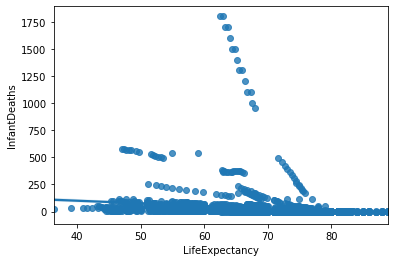

In [14]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns

 
# use the function regplot to make a scatterplot
sns.regplot(x=data["LifeExpectancy"], y=data["InfantDeaths"])